In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [6]:
df1=pd.read_csv('test.csv')

In [8]:
d=df.append(df1)

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
d.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
#handle categorical feature gender
d['Gender']=d['Gender'].map({'F':0, 'M':1})

In [13]:
#handle categorical fearture age.
d['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
d['Age']=d['Age'].map({'0-17':1, '18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7 })

In [18]:
d_city=pd.get_dummies(d['City_Category'], drop_first=True)

In [21]:
d=pd.concat([d_city, d], axis=1)

In [24]:
d.drop('City_Category', axis=1, inplace=True)

In [25]:
d

,B,C,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,1000001,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0
1,0,0,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0
2,0,0,1000001,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0
3,0,0,1000001,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0
4,0,1,1000002,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1,0,1006036,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN
233595,1,0,1006036,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN
233596,1,0,1006036,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN
233597,0,1,1006037,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN


In [34]:
d['Stay_In_Current_City_Years']=d['Stay_In_Current_City_Years'].str.replace('+','')

In [42]:
d['Stay_In_Current_City_Years']=d['Stay_In_Current_City_Years'].astype('float64')
d['B']=d['B'].astype('int32')
d['C']=d['C'].astype('int32')

In [47]:
d.drop('A', inplace=True, axis=1)

In [48]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783653 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   B                           783653 non-null  int32  
 1   C                           783653 non-null  int32  
 2   User_ID                     783653 non-null  int64  
 3   Product_ID                  783653 non-null  object 
 4   Gender                      783653 non-null  int64  
 5   Age                         783653 non-null  int64  
 6   Occupation                  783653 non-null  int64  
 7   Stay_In_Current_City_Years  783653 non-null  float64
 8   Marital_Status              783653 non-null  int64  
 9   Product_Category_1          783653 non-null  int64  
 10  Product_Category_2          783653 non-null  float64
 11  Product_Category_3          783653 non-null  float64
 12  Purchase                    550061 non-null  float64
dtypes: float64(4),

In [28]:
d.isnull().sum()

B                                  0
C                                  0
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [29]:
#Replace missing values .
d['Product_Category_2'].unique() #discrete values so need to fill with mode.

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [30]:
d['Product_Category_2']=d['Product_Category_2'].fillna(d['Product_Category_2'].mode()[0])

In [31]:
d['Product_Category_3']=d['Product_Category_3'].fillna(d['Product_Category_3'].mode()[0])

In [50]:
import seaborn as sns

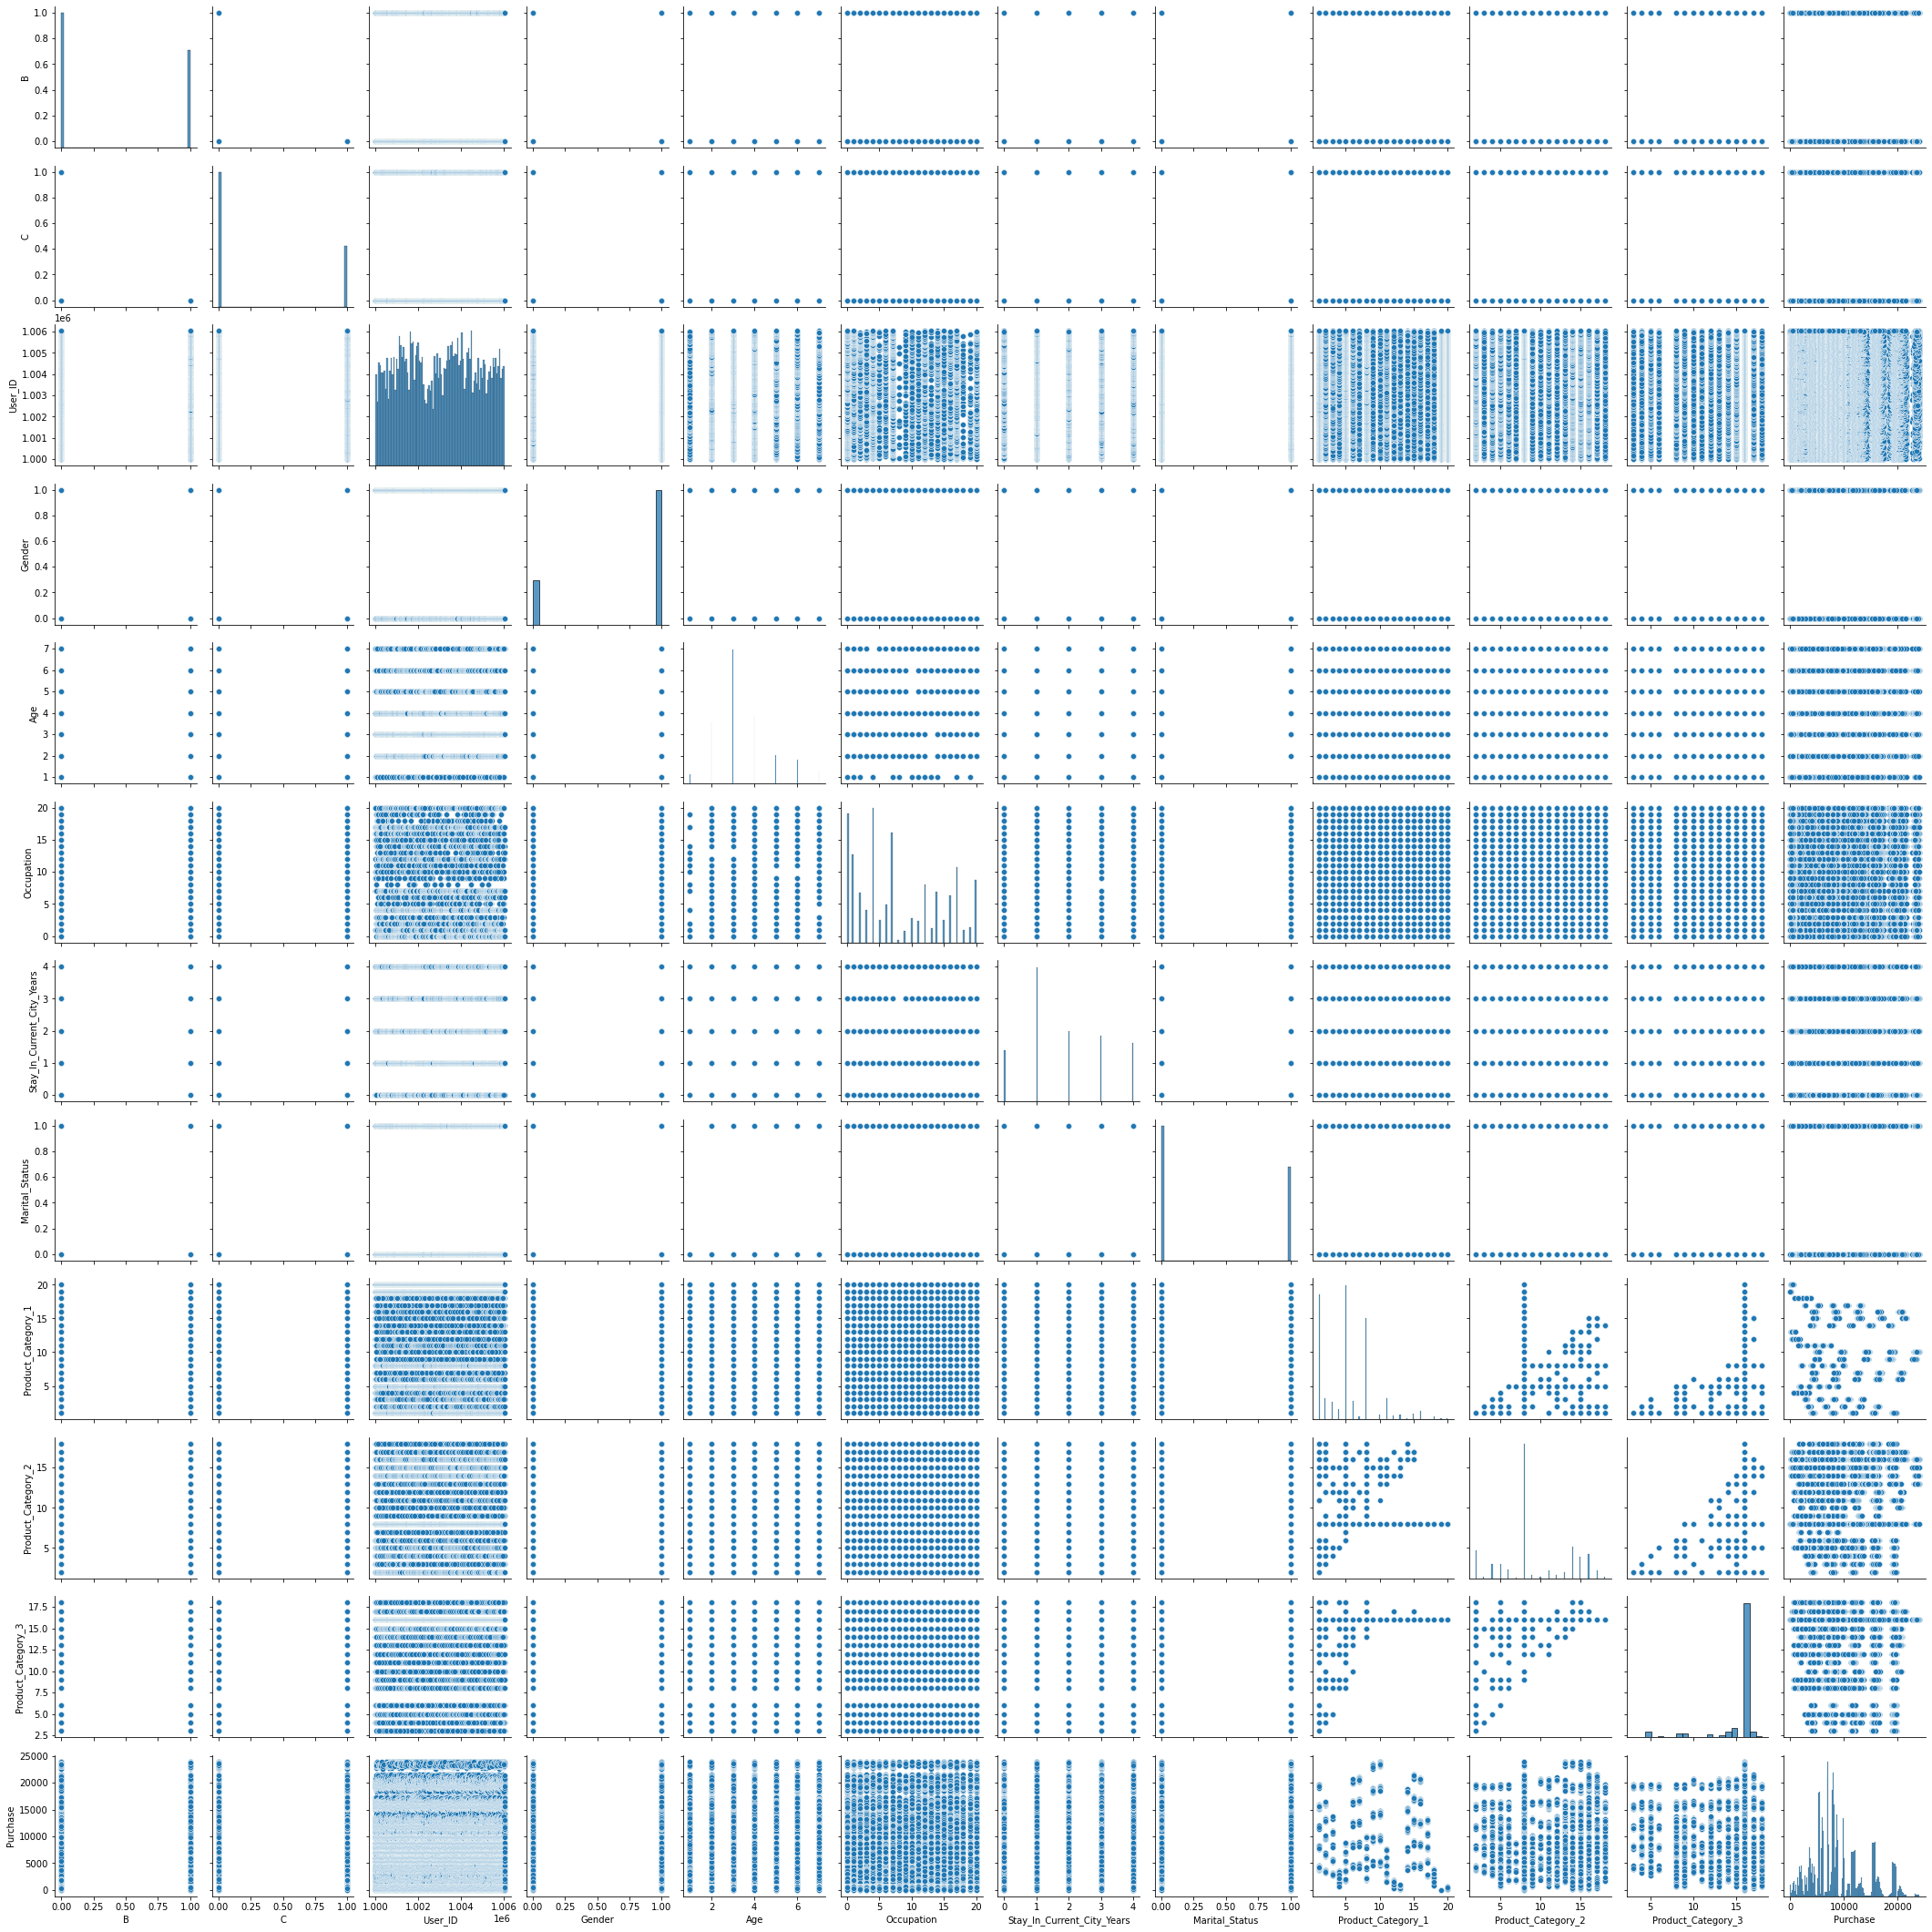

In [51]:
#visualise
sns.pairplot(d)

C:\Users\sasidharreddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

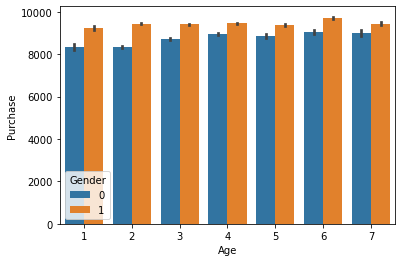

In [52]:
sns.barplot('Age','Purchase', hue='Gender', data=d)

# men buy more than women

C:\Users\sasidharreddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

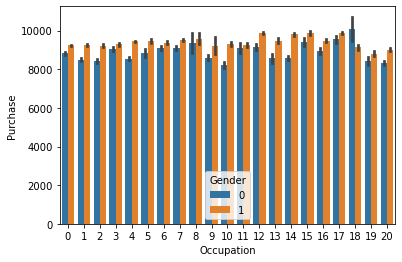

In [53]:
sns.barplot('Occupation','Purchase', hue='Gender', data=d)

C:\Users\sasidharreddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

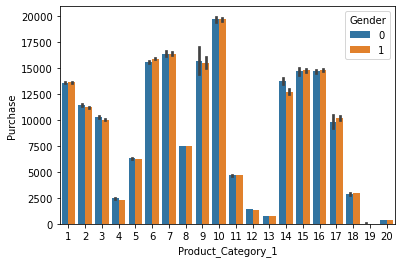

In [54]:
sns.barplot('Product_Category_1','Purchase', hue='Gender', data=d)

C:\Users\sasidharreddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

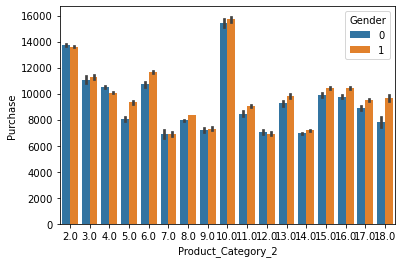

In [55]:
sns.barplot('Product_Category_2','Purchase', hue='Gender', data=d)

C:\Users\sasidharreddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

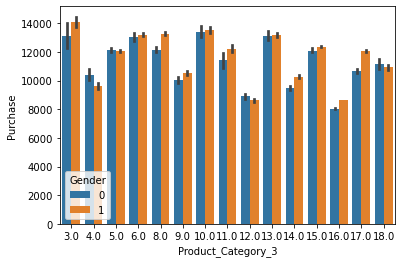

In [56]:
sns.barplot('Product_Category_3','Purchase', hue='Gender', data=d)

In [57]:
##Feature Scaling 
d_test=d[d['Purchase'].isnull()]

In [59]:
d_train=d[~d['Purchase'].isnull()]

In [61]:
X=d_train.drop('Purchase',axis=1)

In [62]:
y=d_train['Purchase']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [64]:
X_train.drop(['Product_ID', 'User_ID'],axis=1,inplace=True)
X_test.drop(['Product_ID', 'User_ID'],axis=1,inplace=True)

C:\Users\sasidharreddy\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [66]:
## train ur model